# Reading files and importing libraries

In [221]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [222]:
final_df = pd.read_csv('../data/final_continents_merge3.csv', index_col=0)
final_df.head()

,continent,country,year,fertility,population,life expectancy
0,Africa,Algeria,1950.0,7.65,8872247.0,42.77
1,Africa,Algeria,1951.0,7.65,9039913.0,43.03
2,Africa,Algeria,1952.0,7.65,9216395.0,43.50
3,Africa,Algeria,1953.0,7.65,9405445.0,43.96
4,Africa,Algeria,1954.0,7.65,9609507.0,44.44


In [223]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10956 entries, 0 to 11568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   continent        10956 non-null  object 
 1   country          10956 non-null  object 
 2   year             10956 non-null  float64
 3   fertility        10956 non-null  float64
 4   population       10956 non-null  float64
 5   life expectancy  10956 non-null  float64
dtypes: float64(4), object(2)
memory usage: 599.2+ KB


In [224]:
population_subset = final_df[final_df['year']== 1998]

In [225]:
population_subset.head()

,continent,country,year,fertility,population,life expectancy
48,Africa,Algeria,1998.0,2.79,30336880.0,72.6
114,Africa,Angola,1998.0,6.91,14187710.0,51.8
180,Africa,Benin,1998.0,6.13,6546493.0,57.0
246,Africa,Botswana,1998.0,3.63,1678111.0,50.9
313,Africa,Burundi,1998.0,7.17,6511920.0,45.5


In [226]:
country_list = ['Germany', 'Bolivia', 'China', 'Brazil', 'Poland']

In [227]:
continent_colors = ["#adb5bd",'#6c757d', "#d3d3d3", '#7d8597', '#D1495B','#6c757d']

# Using a year to preview the chart before generating the gif.

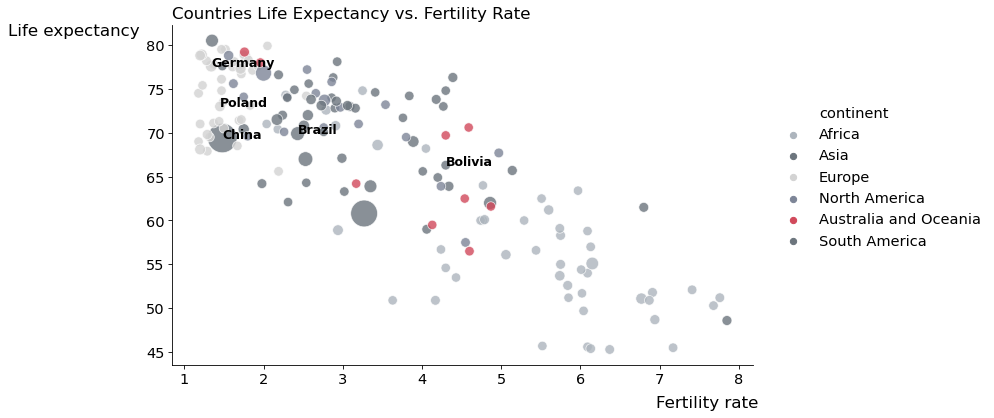

In [228]:
plt.figure(figsize = (10,6), dpi = 75)
ax = plt.gca()
g = sns.scatterplot(data = population_subset, 
                    x = 'fertility', 
                    y = 'life expectancy', 
                    hue = 'continent', 
                    size = population_subset['population'],
                    sizes = (80,800),
                    palette = continent_colors,
                    alpha = 0.8)
h,l = g.get_legend_handles_labels()
plt.legend(h[0:7],l[0:7],bbox_to_anchor=(1.02, 0.8), loc=2, frameon = False, fontsize = 14)

plt.xlabel(r"Fertility rate", size = 16)
plt.ylabel('Life expectancy',rotation=0, size = 16)
ax.yaxis.set_label_coords(-0.17,0.96)
ax.xaxis.set_label_coords(0.92,-0.09)
ax.tick_params(axis='both', which='major', labelsize=14)

plt.title('Countries Life Expectancy vs. Fertility Rate', fontsize = 16, loc = 'left')

sns.despine()

for i in country_list:
    x_cor = float(population_subset.loc[population_subset['country']== i, ['fertility']].values[0])
    y_cor = float(population_subset.loc[population_subset['country']== i, ['life expectancy']].values[0])
    plt.text(s = i, x = x_cor, y = y_cor, fontsize =12, weight = 'bold')


# Code to generate the images

In [230]:
for year in range(1960, 2016):
    population_subset = final_df[final_df['year'] == year]
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data = population_subset, 
                    x = 'fertility', 
                    y = 'life expectancy',
                    size = 'population',
                    hue = 'continent',
                    sizes = (80,800),
                    alpha = 0.8)                
    plt.legend(bbox_to_anchor=(1.02, 1), loc=2)
    plt.legend(h[0:7],l[0:7],bbox_to_anchor=(1.02, 0.8), loc=2, frameon = False,)
    plt.title('Life Expectancy vs Fertility Rate')
    plt.xlabel(r"Fertility rate")
    plt.ylabel('Life Expectancy')
    plt.savefig(f'plot_year_{year}.png',bbox_inches = 'tight')
    plt.close()

# Gif

In [231]:
import imageio
images = []

for year in range(1960, 2016):
    filename = f'plot_year_{year}.png'
    images.append(imageio.imread(f'plot_year_{year}.png'))

imageio.mimsave('plot_year.gif', images, fps=5)